# Neural Style Transfer

In [1]:
import torch
from torchvision import models
import matplotlib.pyplot as plt
from utils import load_image, im_convert, train

In [2]:
# get the "features" portion of VGG19 (we will not need the "classifier" portion)
vgg = models.vgg19(weights="VGG19_Weights.DEFAULT").features

# freeze all VGG parameters since we're only optimizing the target image
for param in vgg.parameters():
    param.requires_grad_(False)

In [3]:
# move the model to GPU, if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
content_dir = './images/image.jpg'
style_dir = './images/hockney.jpg'

# load in content and style image
content = load_image(content_dir).to(device)

# Resize style to match content, makes code easier
style = load_image(style_dir, shape=content.shape[-2:]).to(device)

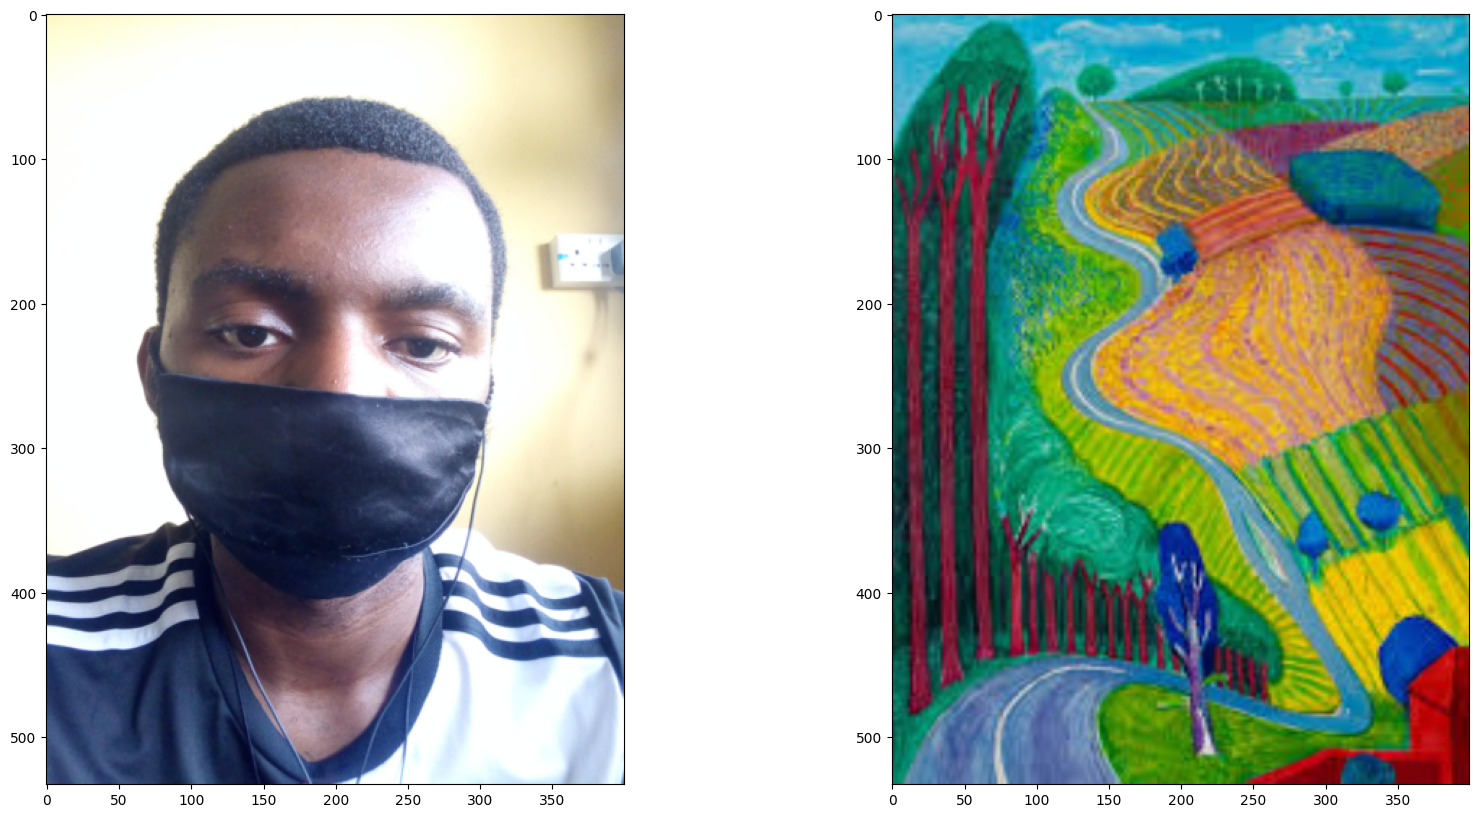

In [6]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# content and style ims side-by-side
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(style))

In [5]:
# weights for each style layer
style_weights = {'conv1_1': 1.,
                'conv2_1': 0.75,
                'conv3_1': 0.2,
                'conv4_1': 0.2,
                'conv5_1': 0.2}

# weights for content loss (alpha) and style loss (beta)
alpha = 1  # alpha
beta = 1e6  # beta
content_loss_layer = 'conv4_2'

 10%|▉         | 999/10000 [03:53<34:53,  4.30it/s]

Total loss:  28685900.0


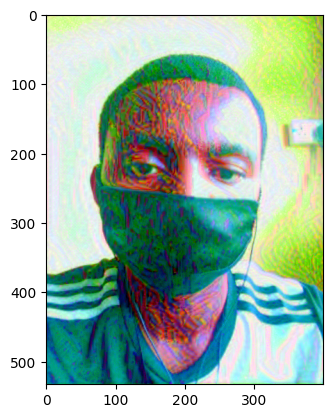

 20%|█▉        | 1999/10000 [07:49<31:41,  4.21it/s]  

Total loss:  8153618.0


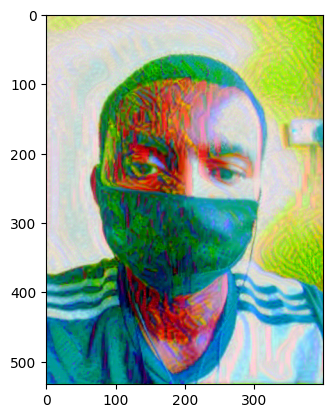

 30%|██▉       | 2999/10000 [16:53<1:06:41,  1.75it/s]

Total loss:  3367223.5


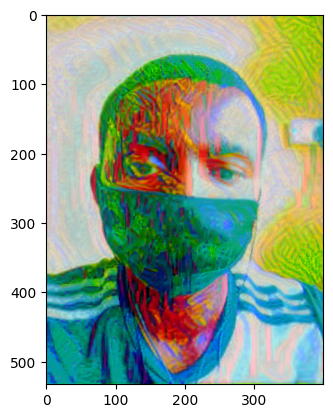

 40%|███▉      | 3999/10000 [26:29<57:11,  1.75it/s]  

Total loss:  1634994.125


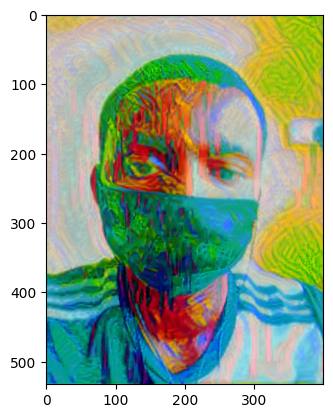

 50%|████▉     | 4999/10000 [36:05<47:13,  1.76it/s]  

Total loss:  876374.3125


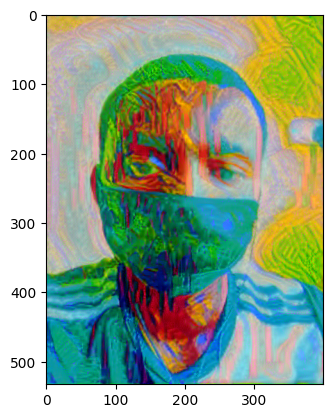

 60%|█████▉    | 5999/10000 [45:37<37:43,  1.77it/s]  

Total loss:  506133.96875


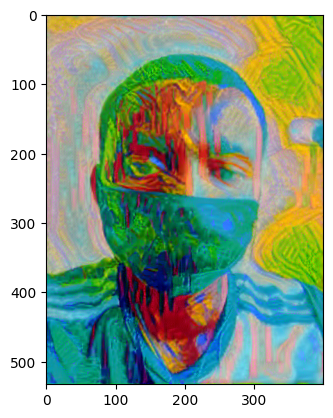

 70%|██████▉   | 6999/10000 [55:12<28:10,  1.77it/s]  

Total loss:  313772.96875


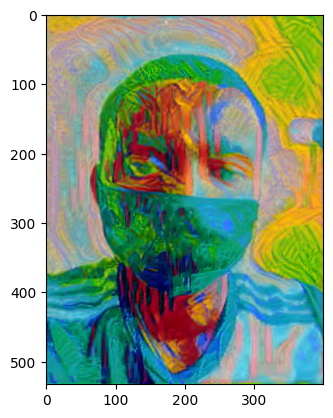

 80%|███████▉  | 7999/10000 [59:46<07:55,  4.21it/s]  

Total loss:  203684.234375


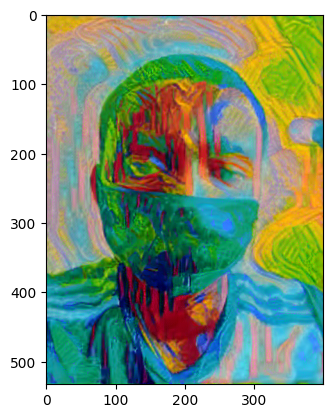

 90%|████████▉ | 8999/10000 [1:03:41<03:51,  4.33it/s]

Total loss:  142481.03125


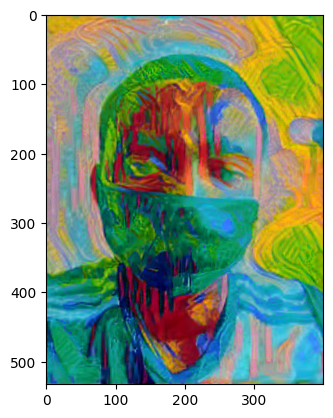

100%|█████████▉| 9999/10000 [1:07:35<00:00,  4.24it/s]

Total loss:  104749.53125


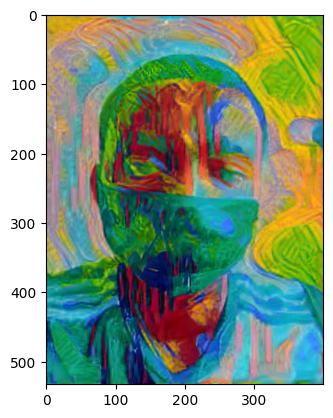

100%|██████████| 10000/10000 [1:07:37<00:00,  2.46it/s]


In [7]:
# transfer style
output_image = train(model=vgg, content=content, style=style, steps=10000, 
                     style_weights=style_weights, content_loss_layer=content_loss_layer,
                     content_weight=alpha, style_weight=beta, show_every=1000)

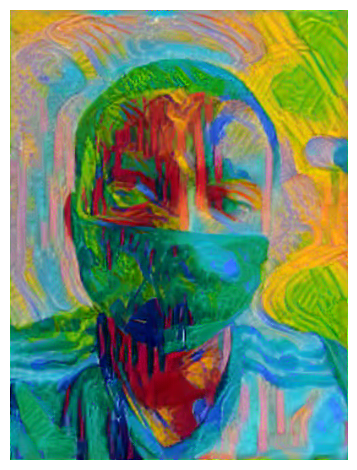

In [8]:
plt.imshow(im_convert(output_image))
plt.axis("off")
plt.tight_layout()
plt.savefig("images/davidcn_hockney.jpg", bbox_inches="tight")